<a href="https://colab.research.google.com/github/typhoon820/google-colab/blob/master/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization



Using TensorFlow backend.


In [2]:
# URL = "https://www.kaggle.com/alxmamaev/flowers-recognition/download"
URL = "https://storage.googleapis.com/kaggle-data-sets/8782/44566/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1572433195&Signature=lzGLbLKtA5tDSADw4x2uUibOISuHNd3Q70gtNie9TZb8Uot5YeIamGyCQ8AsiTKad2R027DSzM%2Fy1mvz01TkweayJ69RgUQkd8Fr%2BH3Y5PcrwslyLeSTAhD8yqAIKbYBUm8QYDhdRJavvK1wWGEofLbmohacQ7z508gg6JZvY65sCVHbjOYX4rR0YwlLrkJY8A4s47BOTLnpmSSQIn0EcWU4u9Olt7P7ZsA6F76iRQyv8U30IPV82KcQC3qOSi9LG9z6aMUSSNHoTL0bLBCBSWQHUhizNS395m7zOdeQkpa%2FwTzFSbwWpm53w8CiTyByxaNbZTZJ6oM10e8Vtqg62g%3D%3D&response-content-disposition=attachment%3B+filename%3Dflowers-recognition.zip"
zip_dir = tf.keras.utils.get_file('flowers-recognition2.zip', origin=URL, extract=True)

471670784/471666316 [==============================] - 5s 0us/step


In [3]:
import os
base = os.path.dirname(zip_dir)
!find $base -type d -print


/root/.keras/datasets
/root/.keras/datasets/flowers
/root/.keras/datasets/flowers/sunflower
/root/.keras/datasets/flowers/rose
/root/.keras/datasets/flowers/flowers
/root/.keras/datasets/flowers/flowers/sunflower
/root/.keras/datasets/flowers/flowers/rose
/root/.keras/datasets/flowers/flowers/dandelion
/root/.keras/datasets/flowers/flowers/daisy
/root/.keras/datasets/flowers/flowers/tulip
/root/.keras/datasets/flowers/dandelion
/root/.keras/datasets/flowers/daisy
/root/.keras/datasets/flowers/tulip


In [4]:
print("fl/fl: ", len(os.listdir("/root/.keras/datasets/flowers/flowers/rose")))

fl/fl:  784


In [5]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/root/.keras/datasets/flowers/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/root/.keras/datasets/flowers/flowers/sunflower'
FLOWER_TULIP_DIR='/root/.keras/datasets/flowers/flowers/tulip'
FLOWER_DANDI_DIR='/root/.keras/datasets/flowers/dandelion'
FLOWER_ROSE_DIR='/root/.keras/datasets/flowers/flowers/rose'
!ls /root/.keras/datasets/flowers/dandelion | grep ".*py"
!rm /root/.keras/datasets/flowers/dandelion/flickr.py
!rm /root/.keras/datasets/flowers/dandelion/flickr.pyc
!rm /root/.keras/datasets/flowers/dandelion/run_me.py

flickr.py
flickr.pyc
run_me.py


In [0]:
def assign_label(img,flower_type):
    return flower_type

In [0]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [8]:
X=[]
Z=[]
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:01<00:00, 462.93it/s]

769


In [9]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:01<00:00, 374.24it/s]

1503


In [10]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 429.75it/s]

2487


In [11]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 449.77it/s]

3539


In [12]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 468.43it/s]

4323


In [13]:
print(len(X))

4323


[[[0.         0.36862745 0.30196078]
  [0.         0.36862745 0.30196078]
  [0.00392157 0.36862745 0.30196078]
  ...
  [0.         0.19215686 0.15686275]
  [0.00392157 0.2        0.16078431]
  [0.         0.2        0.16078431]]

 [[0.00392157 0.36470588 0.29803922]
  [0.00392157 0.36470588 0.29803922]
  [0.00392157 0.34117647 0.28235294]
  ...
  [0.00392157 0.2        0.16078431]
  [0.         0.20392157 0.16470588]
  [0.         0.20392157 0.16470588]]

 [[0.00392157 0.34901961 0.28627451]
  [0.00392157 0.34117647 0.28235294]
  [0.00784314 0.32941176 0.27058824]
  ...
  [0.         0.20392157 0.16470588]
  [0.00392157 0.20784314 0.16862745]
  [0.00392157 0.20784314 0.16862745]]

 ...

 [[0.00784314 0.24313725 0.19607843]
  [0.2        0.28235294 0.25098039]
  [0.01176471 0.29803922 0.24705882]
  ...
  [0.00392157 0.29803922 0.24313725]
  [0.         0.29411765 0.23921569]
  [0.         0.29019608 0.23529412]]

 [[0.01176471 0.25490196 0.20784314]
  [0.23137255 0.31764706 0.28627451]


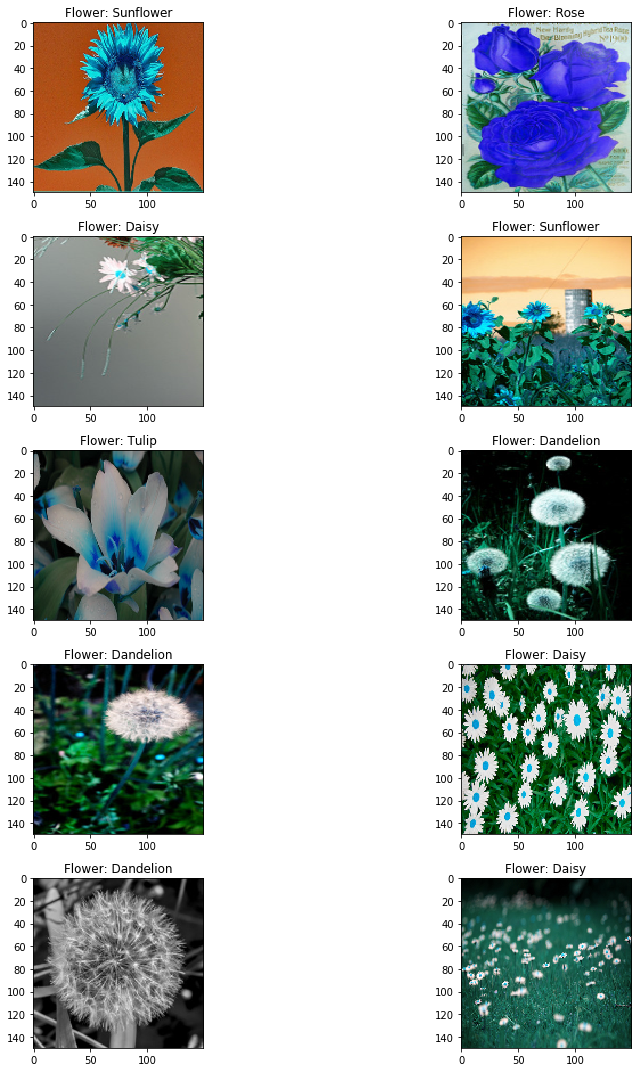

In [62]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
print(X[1])

In [0]:

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255.

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [18]:


model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [0]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(x_train)

In [22]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [24]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





25/25 [==============================] - 23s 911ms/step - loss: 1.5354 - acc: 0.3158 - val_loss: 1.3635 - val_acc: 0.3737
Epoch 2/50
25/25 [==============================] - 18s 714ms/step - loss: 1.2405 - acc: 0.4684 - val_loss: 1.1193 - val_acc: 0.5624
Epoch 3/50
25/25 [==============================] - 18s 710ms/step - loss: 1.0798 - acc: 0.5535 - val_loss: 1.0567 - val_acc: 0.5745
Epoch 4/50
25/25 [==============================] - 18s 729ms/step - loss: 1.0404 - acc: 0.5669 - val_loss: 1.0633 - val_acc: 0.5846
Epoch 5/50
25/25 [==============================] - 18s 712ms/step - loss: 0.9614 - acc: 0.6138 - val_loss: 0.9574 - val_acc: 0.6152
Epoch 6/50
25/25 [==============================] - 17s 694ms/step - loss: 0.9577 - acc: 0.6287 - val_loss: 0.9228 - val_acc: 0.6485
Epoch 7/50
25/25 [==============================] - 18s 711ms/step - loss: 0.9047 - acc: 0.6426 - va

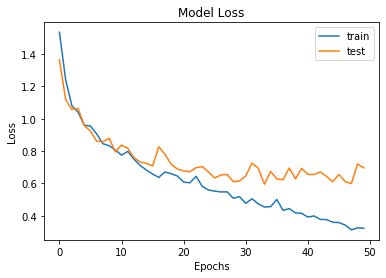

In [25]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

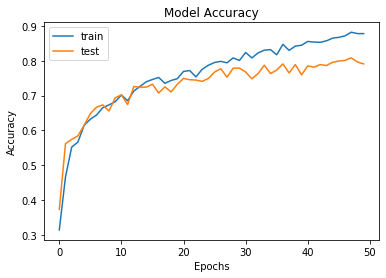

In [26]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
model.save_weights('flowers.h5')

In [0]:
def plot_value_array(predictions, labels):
  plt.grid(False)
  thisplot = plt.bar(range(10), predictions, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(prdeictions)
  thisplot[predicted_label].set_color('red')
  

In [0]:
from keras.preprocessing import image
import requests
from io import *
path = "https://q7i2y6d5.stackpathcdn.com/wp-content/uploads/2019/02/pollenless-sunflower-150x150.jpg"
response = requests.get(path)

img = Image.open(BytesIO(response.content))
img = img.resize((IMG_SIZE, IMG_SIZE))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x * 1./255

[1.7912859e-02 9.8051459e-01 7.3243398e-04 4.4895077e-04 3.9123744e-04]


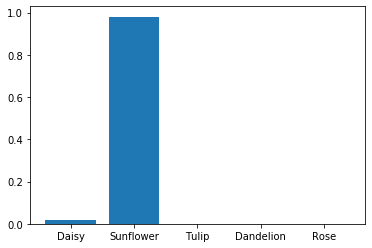

In [66]:
prediction = model.predict(x)
pred_digits=np.argmax(prediction,axis=1)
print(prediction[0])
classes = np.arange(5)
plt.bar(classes, prediction[0])
plt.xticks(classes, ("Daisy", "Sunflower", "Tulip", "Dandelion", "Rose"))
plt.show()